In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Problem 1

In [104]:
# read in data
sp = pd.read_csv('SP.csv',names=['Date', 'Price'])
sptr = pd.read_csv('SPTR.csv',names=['Date', 'Price'])
sptr_r = pd.read_csv('SPTR_ret.csv',names=['Date', 'Value'])
ba = pd.read_csv('BA.csv',names=['Date', 'Price'])
vix = pd.read_csv('VIX.csv',names=['Date', 'Price'])
vix_r = pd.read_csv('VIX_r.csv',names=['Date', 'Value'])
ba_beta = pd.read_csv('BA_beta.csv',names=['Date', 'Price'])
ba_r = pd.read_csv('BA_return.csv',names=['Date', 'Value'])

###1(a)

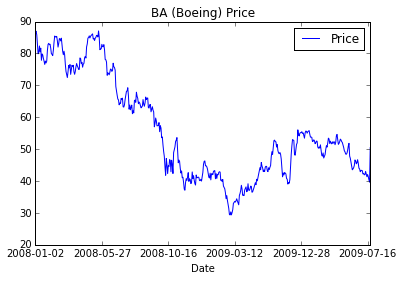

In [29]:
ba.plot(x='Date', y='Price', title='BA (Boeing) Price')
plt.savefig('1aBA.png', format='png')

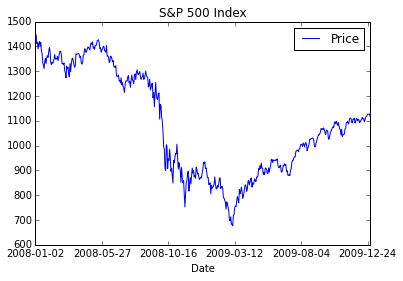

In [27]:
sp.plot(x='Date', y='Price', title='S&P 500 Index')
plt.savefig('1aSP.png', format='png')

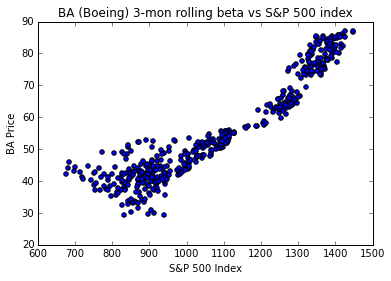

In [109]:
plt.scatter(sp.Price, ba_beta.Price)
plt.title('BA (Boeing) 3-mon rolling beta vs S&P 500 index')
plt.xlabel('S&P 500 Index')
plt.ylabel('BA Price')
plt.savefig('1aBASPscatter.png', format='png')

### 1(b)

In [58]:
import sklearn.linear_model as lm

In [95]:
clf = lm.LinearRegression()
testX = [[i] for i in sptr_r.Value.values]
testY = [[i] for i in ba_r.Value.values]
clf.fit(testX, testY)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

[-0.00041234] [[ 0.92471118]]
[[ 0.92509641]]


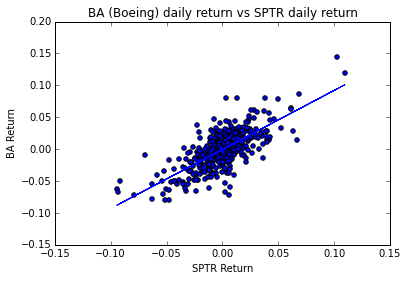

In [96]:
plt.scatter(sptr_r.Value, ba_r.Value)
plt.plot(testX, clf.predict(testX))
plt.title('BA (Boeing) daily return vs SPTR daily return')
plt.xlabel('SPTR Return')
plt.ylabel('BA Return')
plt.savefig('1bBARetSPTRscatter.png', format='png')
print clf.intercept_, clf.coef_
clf2 = lm.LinearRegression(fit_intercept=False)
clf2.fit(testX, testY)
print clf2.coef_

### 1(c)

[-0.00084599] [[-0.23941314]]
[[-0.23939968]]


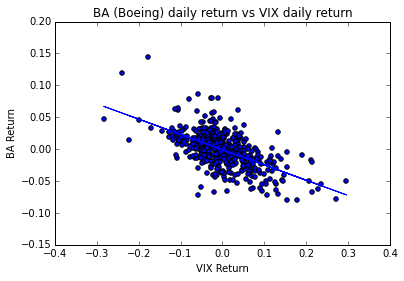

In [108]:
clf3 = lm.LinearRegression()
testX2 = [[i] for i in vix_r.Value.values]
testY = [[i] for i in ba_r.Value.values]
clf3.fit(testX2, testY)
print clf3.intercept_, clf3.coef_
clf4 = lm.LinearRegression(fit_intercept=False)
clf4.fit(testX2, testY)
print clf4.coef_

plt.scatter(vix_r.Value, ba_r.Value)
plt.plot(testX2, clf3.predict(testX2))
plt.title('BA (Boeing) daily return vs VIX daily return')
plt.xlabel('VIX Return')
plt.ylabel('BA Return')
plt.savefig('1cBARetVIXscatter.png', format='png')

## Problem 3

### 3(a)

In [110]:
strat = pd.read_excel('3a_data.xlsx')

In [113]:
strat = strat.fillna(0)[:1260]

In [116]:
total = strat.iloc[1259]
strat = strat[:1259]

In [119]:
strat.head()

,TradeDate,NA,Energy,Materials,Industrials,Consumer Discretionary,Consumer Staples,Health Care,Financials,Information Technology,Telecommunication Services,Utilities,Grand Total,Row Number,Filter
0,01/03/2005,-0.072917,-0.010417,0.093750,0.041667,0.020833,0.000000,-0.031250,-0.020833,-0.020833,0.000000,0.000000,1.110223e-16,1,1
1,01/04/2005,-0.041667,-0.010417,-0.010417,0.052083,-0.031250,-0.020833,-0.010417,-0.020833,0.083333,0.000000,0.000000,-1.041667e-02,3,1
2,01/05/2005,0.000000,0.010417,0.020833,0.020833,0.062500,-0.041667,-0.041667,-0.020833,-0.010417,0.000000,0.000000,0.000000e+00,5,1
3,01/06/2005,-0.104167,0.000000,0.010417,0.041667,-0.020833,-0.020833,-0.041667,-0.031250,0.166667,0.000000,0.000000,0.000000e+00,7,1
4,01/07/2005,0.041667,-0.010417,0.010417,-0.020833,0.010417,-0.010417,-0.031250,-0.072917,0.093750,-0.010417,-0.010417,-1.041667e-02,9,1


In [120]:
max(strat.NA)

0.30985915492399985

###3(d)

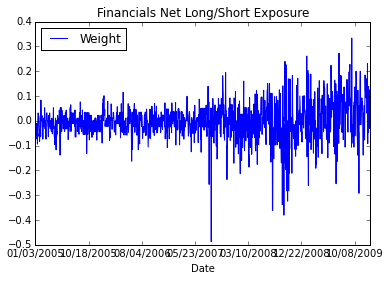

In [163]:
substrat = strat[['TradeDate', 'Financials']]
substrat.columns = ['Date', 'Weight']
substrat.plot(x='Date', y='Weight', title='Financials Net Long/Short Exposure')
plt.savefig('3d.png', format='png')

In [165]:
mask = substrat.Weight.values>=0
substrat_abs_pos = pd.DataFrame({'Date': substrat.Date[mask], 'Long_Weight': substrat.Weight.values[mask]})
substrat_abs_neg = pd.DataFrame({'Date': substrat.Date[~mask], 'Short_Weight': abs(substrat.Weight.values[~mask])})

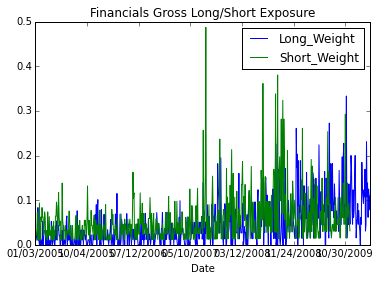

In [166]:
ax1 = substrat_abs_pos.plot(x='Date', y='Long_Weight', title='Financials Gross Long/Short Exposure')
substrat_abs_neg.plot(x='Date', y='Short_Weight', ax=ax1)
plt.savefig('3d_2.png', format='png')